In [1]:
import tensorflow as tf### models
import pandas as pd ### reading and processing data
import seaborn as sns ### visualization
import numpy as np### math computations
import matplotlib.pyplot as plt### plotting bar chart
from keras.layers import Normalization, Dense, InputLayer
from keras.losses import MeanSquaredError, Huber, MeanAbsoluteError
from keras.metrics import RootMeanSquaredError
from keras.optimizers import Adam

In [3]:
data = pd.read_csv("train.csv")
tensor_data = tf.constant(data)
tensor_data = tf.cast(tensor_data, tf.float32)
print(tensor_data)

tf.Tensor(
[[1.000000e+00 5.356510e+05 7.981860e+05 ... 7.300000e+01 1.230000e+02
  3.513180e+05]
 [2.000000e+00 5.919110e+05 8.610560e+05 ... 7.400000e+01 9.500000e+01
  2.850015e+05]
 [3.000000e+00 6.869900e+05 7.707620e+05 ... 5.300000e+01 9.700000e+01
  2.153860e+05]
 ...
 [9.980000e+02 6.463440e+05 8.427330e+05 ... 1.130000e+02 8.900000e+01
  4.058710e+05]
 [9.990000e+02 5.355590e+05 7.324390e+05 ... 1.120000e+02 1.280000e+02
  7.439800e+04]
 [1.000000e+03 5.901050e+05 7.797430e+05 ... 9.900000e+01 9.600000e+01
  4.149385e+05]], shape=(1000, 12), dtype=float32)


In [7]:
tensor_data = tf.random.shuffle(tensor_data)
X = tensor_data[:,3:-1]
y = tensor_data[:,-1]
y = tf.expand_dims(y, axis = -1)
TRAIN_RATIO = 0.8
VAL_RATIO = 0.1
TEST_RATIO = 0.1
DATASET_SIZE = len(X)
X_train = X[:int(DATASET_SIZE*TRAIN_RATIO)]
y_train = y[:int(DATASET_SIZE*TRAIN_RATIO)]
X_val = X[int(DATASET_SIZE*TRAIN_RATIO):int(DATASET_SIZE*(TRAIN_RATIO+VAL_RATIO))]
y_val = y[int(DATASET_SIZE*TRAIN_RATIO):int(DATASET_SIZE*(TRAIN_RATIO+VAL_RATIO))]
X_test = X[int(DATASET_SIZE*(TRAIN_RATIO+VAL_RATIO)):]
y_test = y[int(DATASET_SIZE*(TRAIN_RATIO+VAL_RATIO)):]

In [8]:
normalizer = Normalization()
normalizer.adapt(X_train)

In [26]:
model = tf.keras.Sequential([
                             InputLayer(input_shape = (8,)),
                             normalizer,
                             Dense(128, activation = "relu"),
                             Dense(128, activation = "relu"),
                             Dense(128, activation = "relu"),
                             Dense(1),
])
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 normalization_3 (Normalizat  (None, 8)                17        
 ion)                                                            
                                                                 
 dense_1 (Dense)             (None, 128)               1152      
                                                                 
 dense_2 (Dense)             (None, 128)               16512     
                                                                 
 dense_3 (Dense)             (None, 128)               16512     
                                                                 
 dense_4 (Dense)             (None, 1)                 129       
                                                                 
Total params: 34,322


Trainable params: 34,305
Non-trainable params: 17
_________________________________________________________________


In [27]:
model.compile(optimizer = Adam(learning_rate = 0.1),
              loss = MeanAbsoluteError(),
              metrics = RootMeanSquaredError())
history=model.fit(X_train,y_train, validation_data=(X_val,y_val),epochs=100, verbose=1)

Epoch 1/100
25/25 [==============================] - 1s 7ms/step - loss: 158092.5156 - root_mean_squared_error: 203592.4531 - val_loss: 61335.9258 - val_root_mean_squared_error: 74046.4375
Epoch 2/100
25/25 [==============================] - 0s 2ms/step - loss: 53219.8789 - root_mean_squared_error: 66203.8906 - val_loss: 50732.7891 - val_root_mean_squared_error: 62248.3008
Epoch 3/100
25/25 [==============================] - 0s 3ms/step - loss: 45274.3047 - root_mean_squared_error: 56174.0586 - val_loss: 45491.1953 - val_root_mean_squared_error: 55597.0977
Epoch 4/100
25/25 [==============================] - 0s 2ms/step - loss: 42860.3359 - root_mean_squared_error: 53374.0195 - val_loss: 45552.3984 - val_root_mean_squared_error: 55928.8672
Epoch 5/100
25/25 [==============================] - 0s 3ms/step - loss: 43743.9062 - root_mean_squared_error: 54680.8203 - val_loss: 51299.8906 - val_root_mean_squared_error: 63771.0352
Epoch 6/100
25/25 [==============================] - 0s 3ms/ste

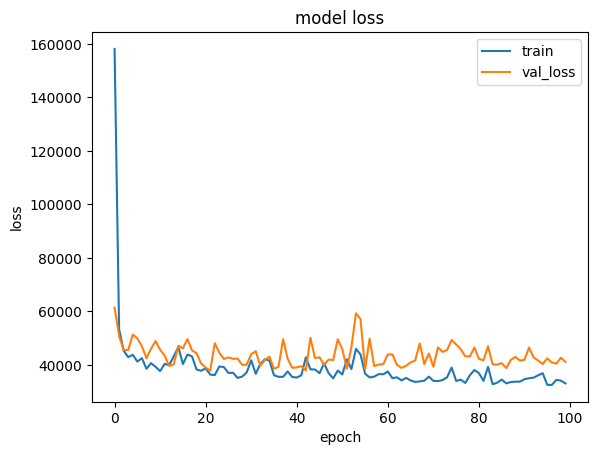

In [28]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val_loss'])
plt.show()

In [33]:
model.predict(tf.expand_dims(X_test, axis = 0 ))

1/1 [==============================] - 0s 60ms/step


array([[[395674.47 ],
        [354272.34 ],
        [429016.78 ],
        [445700.6  ],
        [522430.03 ],
        [413651.6  ],
        [156941.4  ],
        [146537.22 ],
        [421767.6  ],
        [200799.45 ],
        [153247.52 ],
        [162187.08 ],
        [472853.34 ],
        [479488.56 ],
        [128254.46 ],
        [191577.08 ],
        [164506.19 ],
        [335408.5  ],
        [446453.97 ],
        [313963.6  ],
        [530248.4  ],
        [178014.05 ],
        [121700.74 ],
        [389252.66 ],
        [336017.94 ],
        [124346.   ],
        [483585.28 ],
        [429199.72 ],
        [467280.75 ],
        [157122.34 ],
        [483908.62 ],
        [407805.75 ],
        [195225.8  ],
        [524693.   ],
        [234729.47 ],
        [134459.36 ],
        [375241.66 ],
        [251698.25 ],
        [165900.14 ],
        [248469.44 ],
        [135554.47 ],
        [457937.25 ],
        [203323.44 ],
        [319791.1  ],
        [513813.03 ],
        [1

In [35]:
y_test

<tf.Tensor: shape=(100, 1), dtype=float32, numpy=
array([[467395. ],
       [269326. ],
       [381846.5],
       [506854. ],
       [515454. ],
       [435007.5],
       [149899.5],
       [132026.5],
       [367734.5],
       [121022. ],
       [131893.5],
       [207352.5],
       [494575.5],
       [501920.5],
       [177933.5],
       [204833.5],
       [112864.5],
       [299019.5],
       [488457. ],
       [329538.5],
       [468543. ],
       [140884. ],
       [ 77167. ],
       [371227. ],
       [328863. ],
       [150076. ],
       [412014.5],
       [471527.5],
       [458591.5],
       [157507. ],
       [390756.5],
       [431060. ],
       [187009. ],
       [460780. ],
       [239815.5],
       [ 95533.5],
       [380289.5],
       [193067. ],
       [152125.5],
       [212553.5],
       [151474. ],
       [465338.5],
       [220518. ],
       [340112. ],
       [559108. ],
       [210661.5],
       [327994. ],
       [ 96554. ],
       [177509.5],
       [221692. ],


4/4 [==============================] - 0s 1ms/step


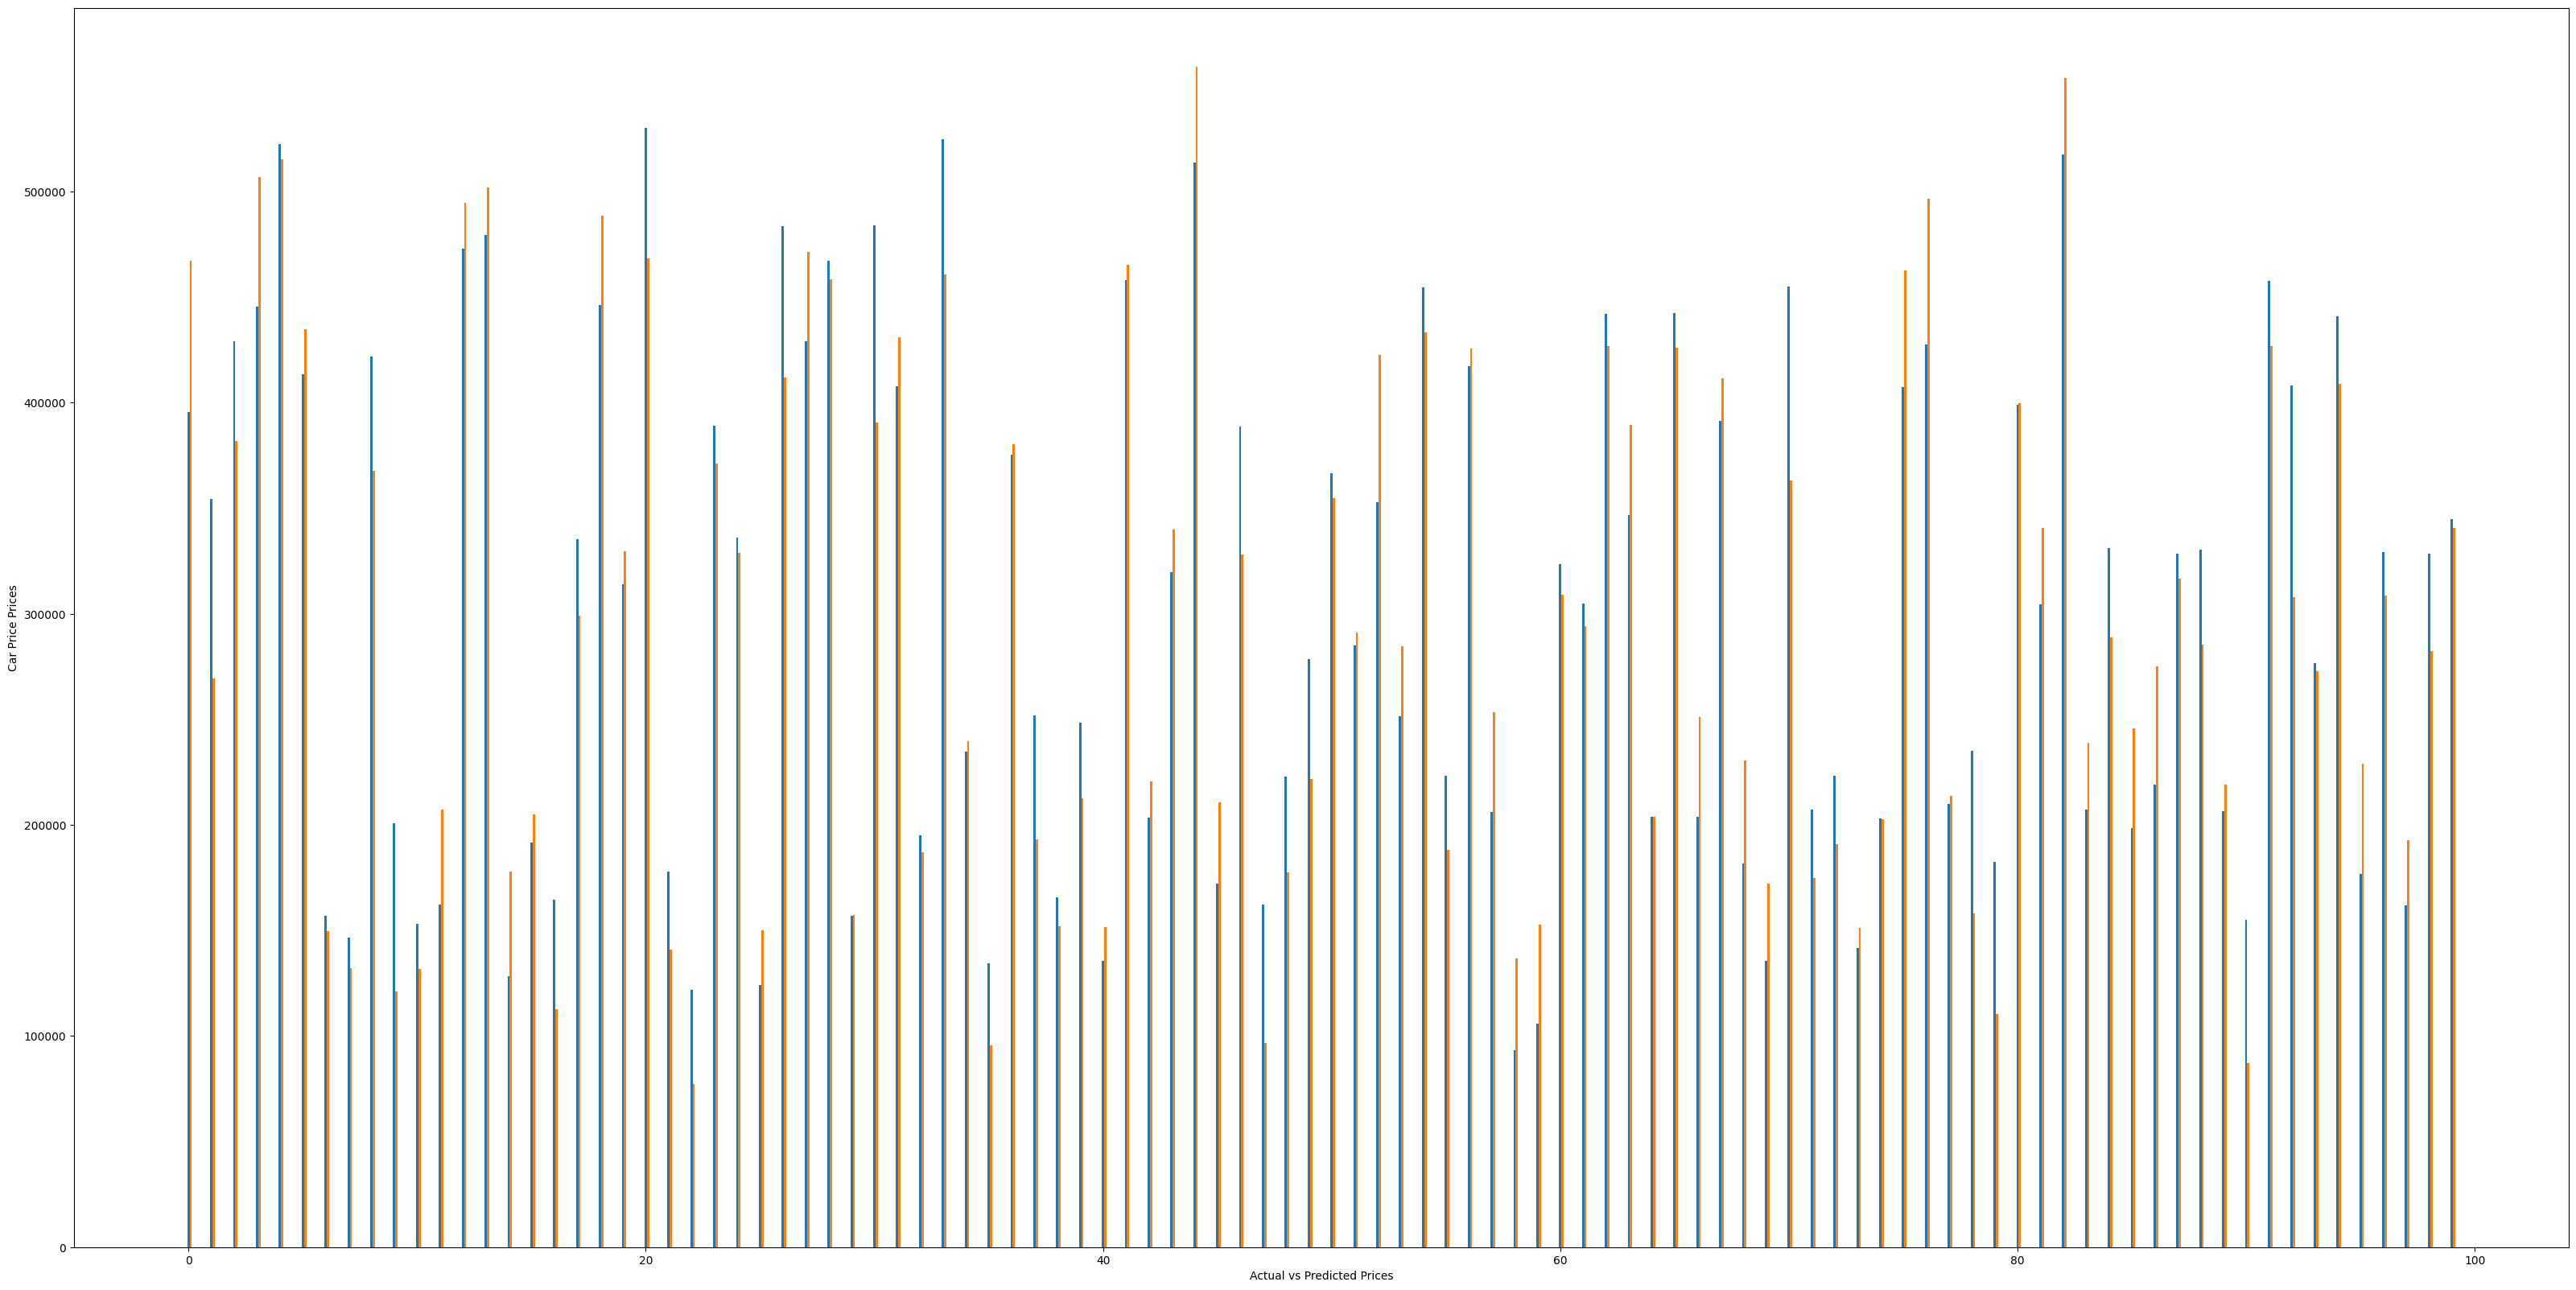

In [36]:
y_true = list(y_test[:,0].numpy())
y_pred = list(model.predict(X_test)[:,0])
ind = np.arange(100)
plt.figure(figsize=(40,20))

width = 0.1

plt.bar(ind, y_pred, width, label='Predicted Car Price')
plt.bar(ind + width, y_true, width, label='Actual Car Price')

plt.xlabel('Actual vs Predicted Prices')
plt.ylabel('Car Price Prices')

plt.show()